In [40]:
%load_ext autoreload
%autoreload 2

# import warnings
# warnings.filterwarnings('ignore')

import os
import sys

parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)

import numpy as np
import pandas as pd

In [41]:
import pandas as pd

# Define function to read data for a single stock
def read_stock_data(stock_symbol, start_date, end_date):
    file_path = f"../data/raw/Stocks/{stock_symbol}.us.txt"
    df = pd.read_csv(file_path, parse_dates=True, index_col=0, header=0)
    df = df[(df.index >= start_date) & (df.index <= end_date)]
    df = df[['Close']].rename(columns={'Close': stock_symbol})
    return df

# Define function to create DataFrame with closing prices for multiple stocks
def create_portfolio_dataframe(stock_symbols, start_date, end_date):
    # Initialize an empty DataFrame
    portfolio_df = pd.DataFrame(index=pd.date_range(start_date, end_date))

    # Loop through each stock symbol
    for stock_symbol in stock_symbols:
        try:
            # Read data for the current stock
            stock_df = read_stock_data(stock_symbol, start_date, end_date)
            
            # Merge the current stock data with the portfolio DataFrame
            portfolio_df = pd.merge(portfolio_df, stock_df, how='left', left_index=True, right_index=True)
        except FileNotFoundError:
            print(f"Data not found for stock: {stock_symbol}")

    return portfolio_df

# Example usage:
if __name__ == "__main__":
    # User inputs
    stock_symbols = ['aapl', 'ibm', 'amzn', 'kodk-ws', 'ba']  # List of stock symbols
    start_date = '2015-01-01'  # Start date of the date range
    end_date = '2015-12-31'  # End date of the date range

    # Create portfolio DataFrame
    portfolio_df = create_portfolio_dataframe(stock_symbols, start_date, end_date)

    # Display the resulting DataFrame
    portfolio_df
portfolio_df

,aapl,ibm,amzn,kodk-ws,ba
2015-01-01,NaN,NaN,NaN,NaN,NaN
2015-01-02,103.50,145.54,308.52,NaN,119.27
2015-01-03,NaN,NaN,NaN,NaN,NaN
2015-01-04,NaN,NaN,NaN,NaN,NaN
2015-01-05,100.58,143.24,302.19,NaN,118.43
...,...,...,...,...,...
2015-12-27,NaN,NaN,NaN,NaN,NaN
2015-12-28,102.83,127.61,675.20,2.04,136.02
2015-12-29,104.68,129.63,693.97,2.22,138.67
2015-12-30,103.32,129.21,689.07,NaN,137.78


In [95]:
import pandas as pd
import yfinance as yf

# Define function to read data for a single stock from Yahoo Finance
def read_stock_data(stock_symbol, start_date, end_date):
    stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
    df = stock_data[['Close']].rename(columns={'Close': stock_symbol})
    return df

# Define function to create DataFrame with closing prices for multiple stocks
def create_portfolio_dataframe(stock_symbols, start_date, end_date):
    # Initialize an empty DataFrame
    portfolio2_df = pd.DataFrame(index=pd.date_range(start_date, end_date))

    # Loop through each stock symbol
    for stock_symbol in stock_symbols:
        try:
            # Read data for the current stock from Yahoo Finance
            stock_df = read_stock_data(stock_symbol, start_date, end_date)
            
            # Merge the current stock data with the portfolio DataFrame
            portfolio2_df = pd.merge(portfolio2_df, stock_df, how='left', left_index=True, right_index=True)
        except Exception as e:
            print(f"Error retrieving data for stock: {stock_symbol}")
            print(e)

    return portfolio2_df

# Example usage:
if __name__ == "__main__":
    # User inputs
    stock_symbols = ['AAPL', 'IBM', 'amzn', 'googl', 'ba']  # List of stock symbols
    start_date = '2015-01-01'  # Start date of the date range
    end_date = '2022-12-31'  # End date of the date range

    # Create portfolio DataFrame
    portfolio2_df = create_portfolio_dataframe(stock_symbols, start_date, end_date)

    # Display the resulting DataFrame
    portfolio2_df
portfolio2_df   

c:\Users\luhar\Documents\Python\FullProject3\Portfolio_Optimization\venv\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
c:\Users\luhar\Documents\Python\FullProject3\Portfolio_Optimization\venv\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
c:\Users\luhar\Documents\Python\FullProject3\Portfolio_Optimization\venv\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future v

,AAPL,IBM,amzn,googl,ba
2015-01-01,NaN,NaN,NaN,NaN,NaN
2015-01-02,27.332500,154.933075,15.426000,26.477501,129.949997
2015-01-03,NaN,NaN,NaN,NaN,NaN
2015-01-04,NaN,NaN,NaN,NaN,NaN
2015-01-05,26.562500,152.495224,15.109500,25.973000,129.050003
...,...,...,...,...,...
2022-12-27,130.029999,142.419998,83.040001,87.389999,189.399994
2022-12-28,126.040001,140.020004,81.820000,86.019997,188.380005
2022-12-29,129.610001,141.059998,84.180000,88.449997,188.910004
2022-12-30,129.929993,140.889999,84.000000,88.230003,190.490005


In [99]:
summary_stats(portfolio2_df.dropna().pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
AAPL,0.009336,0.065385,-0.012156,8.065526,0.028222,0.043129,-0.307653,-0.387297
IBM,-0.000566,0.054174,-0.450426,12.163996,0.024692,0.038675,-0.549186,-0.479143
amzn,0.010154,0.072659,0.469223,9.749361,0.027691,0.047313,-0.265918,-0.561453
googl,0.007201,0.061727,0.317632,10.294362,0.024281,0.040994,-0.359544,-0.443201
ba,0.002282,0.092348,0.251954,19.492620,0.032482,0.060530,-0.292222,-0.784372


In [44]:
def get_stock_returns(ticker):
    """
    Load the Fama-French Dataset for the returns of the Top and Bottom Deciles by MarketCap
    """
    data = pd.read_csv(f"../data/raw/Stocks/{ticker}.us.txt",
                       header=0, index_col=0, parse_dates=True)
    rets = data["Close"].pct_change().dropna()
    return rets

In [45]:
def get_stock_price(ticker):
    """
    Load the stock Dataset for the returns of the Top and Bottom Deciles by MarketCap
    """
    price = pd.read_csv(f"../data/raw/Stocks/{ticker}.us.txt",
                       header=0, index_col=0, parse_dates=True)["Close"]
    return price

In [46]:
portfolio_df

,aapl,ibm,amzn,kodk-ws,ba
2015-01-01,NaN,NaN,NaN,NaN,NaN
2015-01-02,103.50,145.54,308.52,NaN,119.27
2015-01-03,NaN,NaN,NaN,NaN,NaN
2015-01-04,NaN,NaN,NaN,NaN,NaN
2015-01-05,100.58,143.24,302.19,NaN,118.43
...,...,...,...,...,...
2015-12-27,NaN,NaN,NaN,NaN,NaN
2015-12-28,102.83,127.61,675.20,2.04,136.02
2015-12-29,104.68,129.63,693.97,2.22,138.67
2015-12-30,103.32,129.21,689.07,NaN,137.78


# Optimized Portfolio Returns

In [135]:
portfolio_df.dropna()
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
Optimized_portfolio = pd.Series(np.dot(portfolio_df.dropna().dropna(), weights), index=portfolio_df.dropna().index)
Optimized_portfolio
    

2015-03-04    159.244
2015-03-05    160.242
2015-03-09    158.532
2015-03-10    155.188
2015-03-11    153.712
               ...   
2015-12-18    205.020
2015-12-24    206.606
2015-12-28    208.740
2015-12-29    213.834
2015-12-31    208.740
Length: 146, dtype: float64

In [136]:
Opt_rets = Optimized_portfolio.pct_change().dropna()
risky_rets = 100*(1+Opt_rets).cumprod()
risky_rets

2015-03-05    100.626711
2015-03-09     99.552887
2015-03-10     97.452965
2015-03-11     96.526086
2015-03-12     97.711688
                 ...    
2015-12-18    128.745824
2015-12-24    129.741780
2015-12-28    131.081862
2015-12-29    134.280726
2015-12-31    131.081862
Length: 145, dtype: float64

<Axes: >

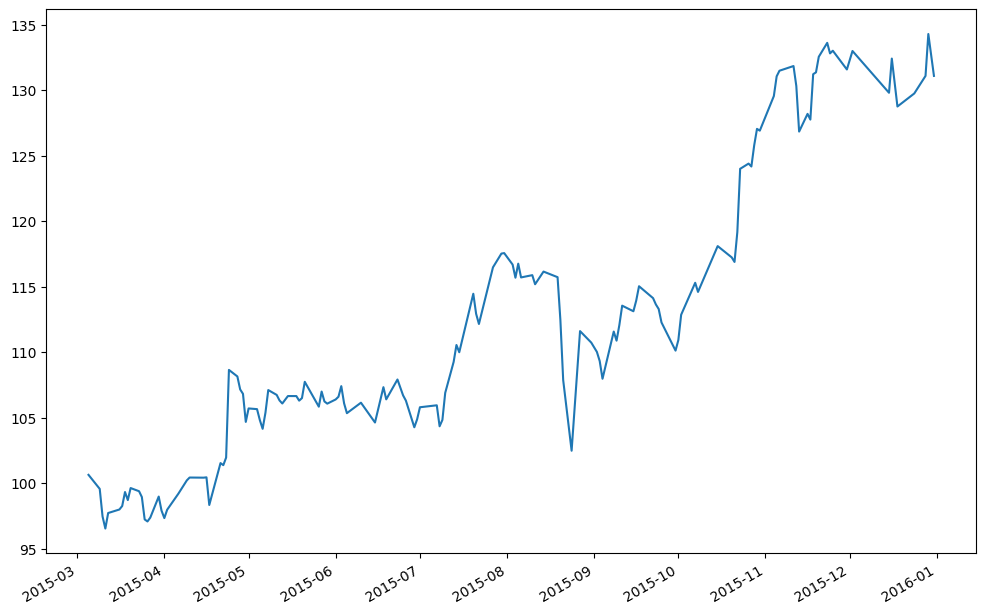

In [137]:
risky_rets.plot(figsize=(12,8))

In [142]:
run_cppi(Opt_rets)

{'Wealth':                       R
 2015-03-05  1004.760267
 2015-03-09   999.181255
 2015-03-10   987.581039
 2015-03-11   983.290859
 2015-03-12   991.128330
 ...                 ...
 2015-12-18  1298.740923
 2015-12-24  1308.787763
 2015-12-28  1322.306020
 2015-12-29  1354.575000
 2015-12-31  1322.306020
 
 [145 rows x 1 columns],
 'Risky Wealth':                       R
 2015-03-05  1006.267112
 2015-03-09   995.528874
 2015-03-10   974.529653
 2015-03-11   965.260858
 2015-03-12   977.116877
 ...                 ...
 2015-12-18  1287.458240
 2015-12-24  1297.417799
 2015-12-28  1310.818618
 2015-12-29  1342.807264
 2015-12-31  1310.818618
 
 [145 rows x 1 columns],
 'Risk Budget':                    R
 2015-03-05  0.200000
 2015-03-09  0.203790
 2015-03-10  0.199344
 2015-03-11  0.189940
 2015-03-12  0.186406
 ...              ...
 2015-12-18  0.401045
 2015-12-24  0.384019
 2015-12-28  0.388747
 2015-12-29  0.394996
 2015-12-31  0.409409
 
 [145 rows x 1 columns],
 'Risky Alloca

In [47]:
def list_symboles_in_directory():
    """
    List filenames available in the specified directory.
    
    Args:
    - directory (str): Path to the directory
    
    Returns:
    - files (list): List of filenames in the directory
    """
    directory = r'C:\Users\luhar\Downloads\archive\Stocks'
    files = []
    symbols = []

    for filename in os.listdir(directory):
        if os.path.isfile(os.path.join(directory, filename)):
            files.append(filename)

    for i in files:
        i = i.split('.')[0]
        symbols.append(i)

    return symbols

In [48]:
tickers = list_symboles_in_directory()
tickers

['a',
 'aa',
 'aaap',
 'aaba',
 'aac',
 'aal',
 'aamc',
 'aame',
 'aan',
 'aaoi',
 'aaon',
 'aap',
 'aapl',
 'aat',
 'aau',
 'aav',
 'aaww',
 'aaxn',
 'ab',
 'abac',
 'abax',
 'abb',
 'abbv',
 'abc',
 'abcb',
 'abcd',
 'abco',
 'abdc',
 'abe',
 'abeo',
 'abeow',
 'abev',
 'abg',
 'abil',
 'abio',
 'ablx',
 'abm',
 'abmd',
 'abr',
 'abrn',
 'abr_a',
 'abr_b',
 'abr_c',
 'abt',
 'abtx',
 'abus',
 'abx',
 'aby',
 'ac',
 'acad',
 'acbi',
 'acc',
 'acco',
 'accp',
 'acer',
 'acerw',
 'acet',
 'acfc',
 'acgl',
 'acglo',
 'acglp',
 'ach',
 'achc',
 'achn',
 'achv',
 'acia',
 'aciu',
 'aciw',
 'acls',
 'acm',
 'acmr',
 'acn',
 'acnb',
 'acor',
 'acp',
 'acre',
 'acrs',
 'acrx',
 'acsf',
 'acsi',
 'acst',
 'acta',
 'actg',
 'acu',
 'acv',
 'acxm',
 'acy',
 'adap',
 'adbe',
 'adc',
 'ades',
 'adhd',
 'adi',
 'adm',
 'adma',
 'admp',
 'adms',
 'adnt',
 'adom',
 'adp',
 'adro',
 'ads',
 'adsk',
 'adsw',
 'adtn',
 'adus',
 'advm',
 'adx',
 'adxs',
 'adxsw',
 'ae',
 'aeb',
 'aed',
 'aee',
 'aeg',
 '

In [49]:
def var_historic(r, level=5):
    """
    Returns the historic Value at Risk at a specified level
    i.e. returns the number such that "level" percent of the returns
    fall below that number, and the (100-level) percent are above
    """
    if isinstance(r, pd.DataFrame):
        return r.aggregate(var_historic, level=level)
    elif isinstance(r, pd.Series):
        return -np.percentile(r, level)
    else:
        raise TypeError("Expected r to be a Series or DataFrame")    
    
def cvar_historic(r, level=5):
    """
    Computes the Conditional VaR of Series or DataFrame
    """
    if isinstance(r, pd.Series):
        is_beyond = r <= -var_historic(r, level=level)
        return -r[is_beyond].mean()
    elif isinstance(r, pd.DataFrame):
        return r.aggregate(cvar_historic, level=level)
    else:
        raise TypeError("Expected r to be a Series or DataFrame")

In [50]:
! pip install scipy

In [51]:
def drawdown(return_series: pd.Series):
    """Takes a time series of asset returns.
       returns a DataFrame with columns for
       the wealth index, 
       the previous peaks, and 
       the percentage drawdown
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({"Wealth": wealth_index, 
                         "Previous Peak": previous_peaks, 
                         "Drawdown": drawdowns})

In [52]:
from scipy.stats import norm


def skewness(r):
    """
    Alternative to scipy.stats.skew()
    Computes the skewness of the supplied Series or DataFrame
    Returns a float or a Series
    """
    demeaned_r = r - r.mean()
    # use the population standard deviation, so set dof=0
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r**3).mean()
    return exp/sigma_r**3


def kurtosis(r):
    """
    Alternative to scipy.stats.kurtosis()
    Computes the kurtosis of the supplied Series or DataFrame
    Returns a float or a Series
    """
    demeaned_r = r - r.mean()
    # use the population standard deviation, so set dof=0
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r**4).mean()
    return exp/sigma_r**4

def var_gaussian(r, level=5, modified=False):
    """
    Returns the Parametric Gauusian VaR of a Series or DataFrame
    If "modified" is True, then the modified VaR is returned,
    using the Cornish-Fisher modification
    """
    # compute the Z score assuming it was Gaussian
    z = norm.ppf(level/100)
    if modified:
        # modify the Z score based on observed skewness and kurtosis
        s = skewness(r)
        k = kurtosis(r)
        z = (z +
                (z**2 - 1)*s/6 +
                (z**3 -3*z)*(k-3)/24 -
                (2*z**3 - 5*z)*(s**2)/36
            )
        
    return -(r.mean() + z*r.std(ddof=0))

In [53]:
rets = get_stock_returns('aapl')

var_table = [var_gaussian(rets), 
             var_gaussian(rets, modified=True), 
             var_historic(rets)]
print(var_table)
# comparison = pd.concat(var_table, axis=1)
# comparison.columns=['Gaussian', 'Cornish-Fisher', 'Historic']
# comparison.plot.bar(title="Hedge Fund Indices: VaR at 5%")

[0.04553632364626816, 0.0366072497874313, 0.04036462762439286]


In [54]:
def annualize_rets(r, periods_per_year):
    """
    Annualizes a set of returns
    We should infer the periods per year
    but that is currently left as an exercise
    to the reader :-)
    """
    compounded_growth = (1+r).prod()
    n_periods = r.shape[0]
    return compounded_growth**(periods_per_year/n_periods)-1

def annualize_vol(r, periods_per_year):
    """
    Annualizes the vol of a set of returns
    We should infer the periods per year
    but that is currently left as an exercise
    to the reader :-)
    """
    return r.std()*(periods_per_year**0.5)

def sharpe_ratio(r, riskfree_rate, periods_per_year):
    """
    Computes the annualized sharpe ratio of a set of returns
    """
    # convert the annual riskfree rate to per period
    rf_per_period = (1+riskfree_rate)**(1/periods_per_year)-1
    excess_ret = r - rf_per_period
    ann_ex_ret = annualize_rets(excess_ret, periods_per_year)
    ann_vol = annualize_vol(r, periods_per_year)
    return ann_ex_ret/ann_vol

In [55]:
sharpe_ratio(rets, 0.07, 252)

0.26754145776629146

In [56]:
def portfolio_return(weights, returns):
    """
    Computes the return on a portfolio from constituent returns and weights
    weights are a numpy array or Nx1 matrix and returns are a numpy array or Nx1 matrix
    """
    return weights.T @ returns

def portfolio_vol(weights, covmat):
    """
    Computes the vol of a portfolio from a covariance matrix and constituent weights
    weights are a numpy array or N x 1 maxtrix and covmat is an N x N matrix
    """
    return (weights.T @ covmat @ weights)**0.5

In [57]:
from scipy.optimize import minimize

def minimize_vol(target_return, er, cov):
    """
    Returns the optimal weights that achieve the target return
    given a set of expected returns and a covariance matrix
    """
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),) * n # an N-tuple of 2-tuples!
    # construct the constraints
    weights_sum_to_1 = {'type': 'eq',
                        'fun': lambda weights: np.sum(weights) - 1
    }
    return_is_target = {'type': 'eq',
                        'args': (er,),
                        'fun': lambda weights, er: target_return - portfolio_return(weights,er)
    }
    weights = minimize(portfolio_vol, init_guess,
                       args=(cov,), method='SLSQP',
                       options={'disp': False},
                       constraints=(weights_sum_to_1,return_is_target),
                       bounds=bounds)
    return weights.x

In [58]:
def msr(riskfree_rate, er, cov):
    """
    Returns the weights of the portfolio that gives you the maximum sharpe ratio
    given the riskfree rate and expected returns and a covariance matrix
    """
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),) * n # an N-tuple of 2-tuples!
    # construct the constraints
    weights_sum_to_1 = {'type': 'eq',
                        'fun': lambda weights: np.sum(weights) - 1
    }
    
    def neg_sharpe(weights, riskfree_rate, er, cov):
        """
        Returns the negative of the sharpe ratio
        of the given portfolio
        """
        r = portfolio_return(weights, er)
        vol = portfolio_vol(weights, cov)
        return -(r - riskfree_rate)/vol
    
    weights = minimize(neg_sharpe, init_guess,
                       args=(riskfree_rate, er, cov), method='SLSQP',
                       options={'disp': False},
                       constraints=(weights_sum_to_1,),
                       bounds=bounds)
    return weights.x

def gmv(cov):
    """
    Returns the weights of the Global Minimum Volatility portfolio
    given a covariance matrix
    """
    n = cov.shape[0]
    return msr(0, np.repeat(1, n), cov)

In [125]:
def optimal_weights(n_points, er, cov):
    """
    Returns a list of weights that represent a grid of n_points on the efficient frontier
    """
    target_rs = np.linspace(er.min(), er.max(), n_points)
    weights = [minimize_vol(target_return, er, cov) for target_return in target_rs]
    return weights


def plot_ef(n_points, er, cov, style='.-', legend=False, show_cml=False, riskfree_rate=0, show_ew=False, show_gmv=False):
    """
    Plots the multi-asset efficient frontier
    """
    weights = optimal_weights(n_points, er, cov)
    rets = [portfolio_return(w, er) for w in weights]
    vols = [portfolio_vol(w, cov) for w in weights]
    ef = pd.DataFrame({
        "Returns": rets, 
        "Volatility": vols
    })
    
    ax = ef.plot.line(x="Volatility", y="Returns", style=style, legend=legend)
    if show_cml:
        ax.set_xlim(left = 0)
        # get MSR
        w_msr = msr(riskfree_rate, er, cov)
        r_msr = portfolio_return(w_msr, er)
        vol_msr = portfolio_vol(w_msr, cov)
        # add CML
        cml_x = [0, vol_msr]
        cml_y = [riskfree_rate, r_msr]
        ax.plot(cml_x, cml_y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=10)
    if show_ew:
        n = er.shape[0]
        w_ew = np.repeat(1/n, n)
        r_ew = portfolio_return(w_ew, er)
        vol_ew = portfolio_vol(w_ew, cov)
        # add EW
        ax.plot([vol_ew], [r_ew], color='goldenrod', marker='o', markersize=10)
    if show_gmv:
        w_gmv = gmv(cov)
        r_gmv = portfolio_return(w_gmv, er)
        vol_gmv = portfolio_vol(w_gmv, cov)
        # add EW
        ax.plot([vol_gmv], [r_gmv], color='midnightblue', marker='o', markersize=10)
        
    return ax

<Axes: xlabel='Volatility'>

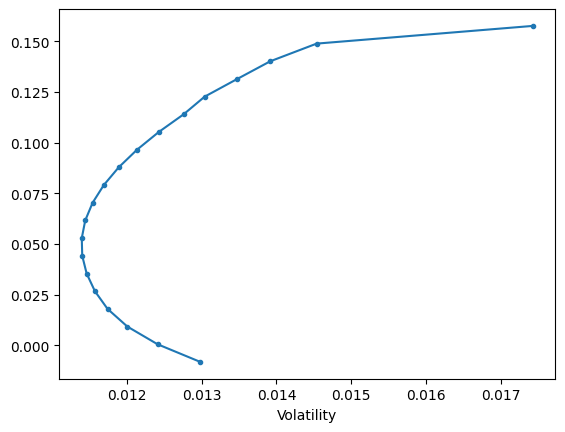

In [127]:
plot_ef(20, er, cov, style='.-', legend=False, show_cml=False, riskfree_rate=0.07, show_ew=False, show_gmv=False)


In [114]:
er = annualize_rets(portfolio2_df.pct_change().dropna(), 252)
cov = portfolio2_df.pct_change().dropna().cov()

C:\Users\luhar\AppData\Local\Temp\ipykernel_2712\2925224822.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  er = annualize_rets(portfolio2_df.pct_change().dropna(), 252)
C:\Users\luhar\AppData\Local\Temp\ipykernel_2712\2925224822.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  cov = portfolio2_df.pct_change().dropna().cov()


In [115]:
er

AAPL                 0.144007
IBM                 -0.008166
amzn                 0.157497
googl                0.109464
ba                   0.033557
optimized returns    0.021009
dtype: float64

In [116]:
cov

,AAPL,IBM,amzn,googl,ba,optimized returns
AAPL,0.000246,0.000088,0.000160,0.000148,0.000146,0.000121
IBM,0.000088,0.000169,0.000070,0.000083,0.000132,0.000139
amzn,0.000160,0.000070,0.000303,0.000171,0.000117,0.000116
googl,0.000148,0.000083,0.000171,0.000219,0.000136,0.000117
ba,0.000146,0.000132,0.000117,0.000136,0.000490,0.000132
optimized returns,0.000121,0.000139,0.000116,0.000117,0.000132,0.000135


In [117]:
msr(0.07, er, cov)

array([4.67301011e-01, 0.00000000e+00, 5.32698989e-01, 1.97519952e-15,
       0.00000000e+00, 1.09179159e-15])

In [105]:
gmv(cov)

array([0.13081826, 0.55067047, 0.1174838 , 0.20102747, 0.        ])

In [93]:
portfolio_return(gmv(cov), er)

0.06477660734848958

In [94]:
portfolio_vol(gmv(cov), cov)

0.009540061862399682

<Axes: >

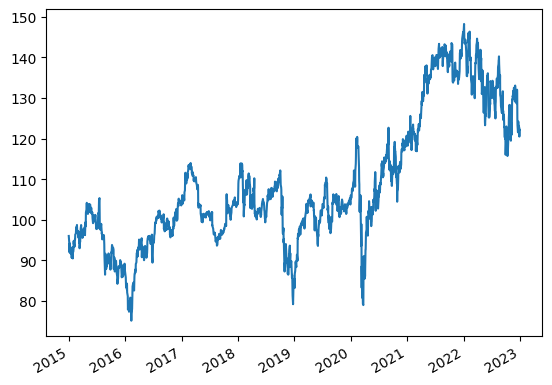

In [113]:
# write a code to add new column in the portfolio2_df dataframe with the name of the `optimized returns`

# portfolio2_df['optimized returns'] = portfolio2_df[columns].dot(gmv(cov))
portfolio2_df['optimized returns'].dropna().plot()


In [121]:
compound(portfolio2_df['optimized returns'].dropna().pct_change().dropna())

0.2724089983394714

In [107]:
for ticker, weight in zip(portfolio2_df.columns, gmv(cov)):
    portfolio2_df['Optimized Portfolio'] += portfolio2_df[ticker]*weight

portfolio2_df['Optimized Portfolio'].plot(figsize=(12,8), label='Optimized Portfolio')

KeyError: 'Optimized Portfolio'

In [86]:
w_msr = msr(0.03, er, cov)
w_msr

array([4.07554546e-12, 5.10044784e-12, 1.00000000e+00, 0.00000000e+00,
       1.52194923e-12])

In [119]:
def compound(r):
    """
    returns the result of compounding the set of returns in r
    Identical to `return (r+1).prod()-1`, but more efficient
    """
    return np.expm1(np.log1p(r).sum())

In [141]:
def run_cppi(risky_r, safe_r=None, m=3, start=1000, floor=0.8, riskfree_rate=0.03, drawdown=None):
    """
    Run a backtest of the CPPI strategy, given a set of returns for the risky asset
    Returns a dictionary containing: Asset Value History, Risk Budget History, Risky Weight History
    """
    # set up the CPPI parameters
    dates = risky_r.index
    n_steps = len(dates)
    account_value = start
    floor_value = start*floor
    peak = account_value
    if isinstance(risky_r, pd.Series): 
        risky_r = pd.DataFrame(risky_r, columns=["R"])

    if safe_r is None:
        safe_r = pd.DataFrame().reindex_like(risky_r)
        safe_r.values[:] = riskfree_rate/12 # fast way to set all values to a number
    # set up some DataFrames for saving intermediate values
    account_history = pd.DataFrame().reindex_like(risky_r)
    risky_w_history = pd.DataFrame().reindex_like(risky_r)
    cushion_history = pd.DataFrame().reindex_like(risky_r)
    floorval_history = pd.DataFrame().reindex_like(risky_r)
    peak_history = pd.DataFrame().reindex_like(risky_r)

    for step in range(n_steps):
        if drawdown is not None:
            peak = np.maximum(peak, account_value)
            floor_value = peak*(1-drawdown)
        cushion = (account_value - floor_value)/account_value
        risky_w = m*cushion
        risky_w = np.minimum(risky_w, 1)
        risky_w = np.maximum(risky_w, 0)
        safe_w = 1-risky_w
        risky_alloc = account_value*risky_w
        safe_alloc = account_value*safe_w
        # recompute the new account value at the end of this step
        account_value = risky_alloc*(1+risky_r.iloc[step]) + safe_alloc*(1+safe_r.iloc[step])
        # save the histories for analysis and plotting
        cushion_history.iloc[step] = cushion
        risky_w_history.iloc[step] = risky_w
        account_history.iloc[step] = account_value
        floorval_history.iloc[step] = floor_value
        peak_history.iloc[step] = peak
    risky_wealth = start*(1+risky_r).cumprod()
    backtest_result = {
        "Wealth": account_history,
        "Risky Wealth": risky_wealth, 
        "Risk Budget": cushion_history,
        "Risky Allocation": risky_w_history,
        "m": m,
        "start": start,
        "floor": floor,
        "risky_r":risky_r,
        "safe_r": safe_r,
        "drawdown": drawdown,
        "peak": peak_history,
        "floor": floorval_history
    }
    return backtest_result

In [67]:
def summary_stats(r, riskfree_rate=0.03):
    """
    Return a DataFrame that contains aggregated summary stats for the returns in the columns of r
    """
    ann_r = r.aggregate(annualize_rets, periods_per_year=12)
    ann_vol = r.aggregate(annualize_vol, periods_per_year=12)
    ann_sr = r.aggregate(sharpe_ratio, riskfree_rate=riskfree_rate, periods_per_year=12)
    dd = r.aggregate(lambda r: drawdown(r).Drawdown.min())
    skew = r.aggregate(skewness)
    kurt = r.aggregate(kurtosis)
    cf_var5 = r.aggregate(var_gaussian, modified=True)
    hist_cvar5 = r.aggregate(cvar_historic)
    return pd.DataFrame({
        "Annualized Return": ann_r,
        "Annualized Vol": ann_vol,
        "Skewness": skew,
        "Kurtosis": kurt,
        "Cornish-Fisher VaR (5%)": cf_var5,
        "Historic CVaR (5%)": hist_cvar5,
        "Sharpe Ratio": ann_sr,
        "Max Drawdown": dd
    })